# Классификация новостных лент

## Используемые библиотеки

In [15]:
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

## Осмотр данных

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = {word_index.get(key): key for key in word_index.keys()}

In [9]:
string_decoding = ' '.join([reverse_word_index.get(idx) for idx in train_data[0]])

## Подготовка данных

In [10]:
def vectorize_sequences(sequences, dimension = 10_000):
    result = np.zeros((len(sequences), dimension))
    
    for i in range(len(sequences)):
        result[i, sequences[i]] = 1
        
    return result

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

##  Обучение модели

### Тренировочные и валидационные данные

In [25]:
x_val = x_train[:1000]
x_train = x_train[1000:]

In [26]:
y_val = y_train[:1000]
y_train = y_train[1000:]

### Конструирование сети

In [72]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10_000,)))
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

### Обучение

In [73]:
model = get_model()
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.4477 - accuracy: 0.5611 - val_loss: 1.7162 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.4151 - accuracy: 0.7215 - val_loss: 1.3078 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 1s 36ms/step - loss: 1.0416 - accuracy: 0.7864 - val_loss: 1.1175 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 0.8149 - accuracy: 0.8338 - val_loss: 0.9919 - val_accuracy: 0.8000
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.6525 - accuracy: 0.8712 - val_loss: 0.9207 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5301 - accuracy: 0.8961 - val_loss: 0.8753 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 1s 36ms/step - loss: 0.4354 - accuracy: 0.9132 - val_loss: 0.8499 - val_accuracy: 0.8210
Epoch 8/20
16

### Провека метрик

In [74]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [75]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

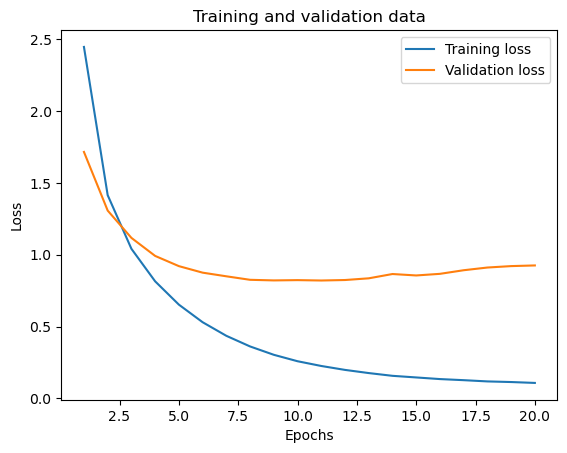

In [76]:
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

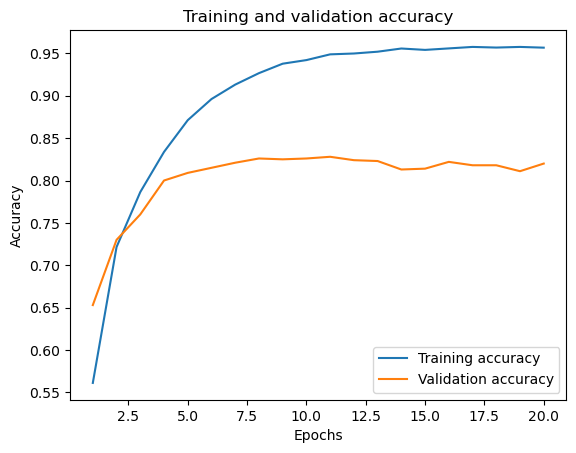

In [78]:
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Финальное обучение

In [79]:
model = get_model()
history = model.fit(
    x_train,
    y_train,
    epochs=7,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/7
16/16 [==============================] - 1s 44ms/step - loss: 2.7797 - accuracy: 0.5416 - val_loss: 1.9695 - val_accuracy: 0.6620
Epoch 2/7
16/16 [==============================] - 1s 36ms/step - loss: 1.5864 - accuracy: 0.7179 - val_loss: 1.3998 - val_accuracy: 0.7190
Epoch 3/7
16/16 [==============================] - 1s 37ms/step - loss: 1.1159 - accuracy: 0.7854 - val_loss: 1.1534 - val_accuracy: 0.7640
Epoch 4/7
16/16 [==============================] - 1s 36ms/step - loss: 0.8541 - accuracy: 0.8291 - val_loss: 1.0138 - val_accuracy: 0.8040
Epoch 5/7
16/16 [==============================] - 1s 37ms/step - loss: 0.6794 - accuracy: 0.8692 - val_loss: 0.9317 - val_accuracy: 0.8120
Epoch 6/7
16/16 [==============================] - 1s 36ms/step - loss: 0.5508 - accuracy: 0.8945 - val_loss: 0.8733 - val_accuracy: 0.8210
Epoch 7/7
16/16 [==============================] - 1s 35ms/step - loss: 0.4554 - accuracy: 0.9097 - val_loss: 0.8410 - val_accuracy: 0.8180


## Результат

In [80]:
result = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9235 - accuracy: 0.7894


In [81]:
result

[0.9234695434570312, 0.7894033789634705]

## Выводы

Вывод такой же, каким и был в [предыдущем файле](./%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D0%BE%D1%82%D0%B7%D1%8B%D0%B2%D0%BE%D0%B2%20%D0%BA%20%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%B0%D0%BC.ipynb)

[Продолжение](./%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%86%D0%B5%D0%BD%20%D0%BD%D0%B0%20%D0%B4%D0%BE%D0%BC%D0%B0.ipynb)